In [1]:
import numpy as np
import pickle
import h5py
from scipy.sparse import csr_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from evaluation import get_metric

In [2]:
def topk_values(array, topk):
    temp_mat = np.zeros(len(array))
    topk = min(topk, np.count_nonzero(array > 0))
    temp_mat[np.argpartition(array, -topk)[-topk:]] = 1
    return temp_mat

def topk_per_row(matrix, topk):
    temp_mat = np.apply_along_axis(topk_values, 1, matrix, topk)
    return temp_mat

In [3]:
depth = 20
recipe_threshold = 2000
ingred_threshold = 700
label_threshold = 10
label_topk = 5

In [4]:
h5f_train = h5py.File('./Container/train', 'r')
train_features = h5f_train['features_boolean'][:]
train_labels = h5f_train['labels_one_hot'][:]
h5f_train.close()

In [5]:
h5f_valid = h5py.File('./Container/valid_clf', 'r')
valid_features = h5f_valid['features_boolean'][:]
answer = h5f_valid['labels_int_enc'][:]
h5f_valid.close()

answer_dict = {}
for i, ans in enumerate(answer):
    answer_dict[i] = ans

In [12]:
recipe_num, ingred_num = train_features.shape
_, label_num = train_labels.shape

1 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.06434760448521916	recall_rank: 2.120792079207921
depth:1	macro_f1: 0.19137110421722192	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.6277437988447117	recall: 0.7394240570846076	recall_rank: 1.4676891263139755
depth:2	macro_f1: 0.19196800482688609	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.6277544172612934	recall: 0.7395514780835881	recall_rank: 1.4679531357684357
depth:3	macro_f1: 0.13801941558239347	micro_f1: 0.4506880733944954	acc: 0.4506880733944954	MAP: 0.5628907577302051	recall: 0.6451325178389399	recall_rank: 1.4594114161564289
depth:4	macro_f1: 0.13799178706879994	micro_f1: 0.4505606523955148	acc: 0.4505606523955148	MAP: 0.5626911314984689	recall: 0.644750254841998	recall_rank: 1.458893280632411
depth:5	macro_f1: 0.12960254899965742	micro_f1: 0.43132008154943935	acc: 0.43132008154943935	MAP: 0.5255139313625561	rec

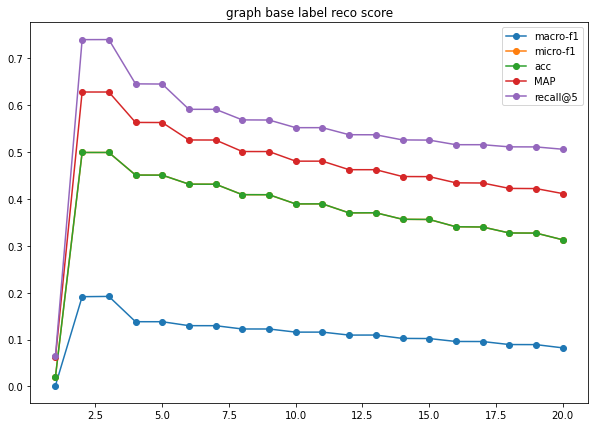

1 2
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.06434760448521916	recall_rank: 2.120792079207921
depth:1	macro_f1: 0.19137110421722192	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.6277437988447117	recall: 0.7394240570846076	recall_rank: 1.4676891263139755
depth:2	macro_f1: 0.19137110421722192	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.6277119435949665	recall: 0.7392966360856269	recall_rank: 1.4675973802137194
depth:3	macro_f1: 0.14939013090616024	micro_f1: 0.4673802242609582	acc: 0.4673802242609582	MAP: 0.5882156812776053	recall: 0.6859072375127421	recall_rank: 1.4766858629017277
depth:4	macro_f1: 0.14938884690097842	micro_f1: 0.4673802242609582	acc: 0.4673802242609582	MAP: 0.588158341828064	recall: 0.6859072375127421	recall_rank: 1.4766858629017277
depth:5	macro_f1: 0.14212315911948642	micro_f1: 0.46088175331294595	acc: 0.46088175331294595	MAP: 0.5730058613659517	re

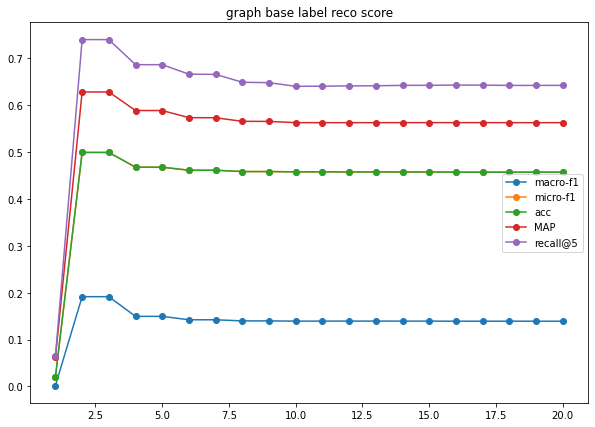

1 4
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.06434760448521916	recall_rank: 2.120792079207921
depth:1	macro_f1: 0.19137110421722192	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.6277437988447117	recall: 0.7394240570846076	recall_rank: 1.4676891263139755
depth:2	macro_f1: 0.19133580943330597	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.6276758409785888	recall: 0.7394240570846076	recall_rank: 1.468033775633293
depth:3	macro_f1: 0.16681448020124828	micro_f1: 0.4841997961264016	acc: 0.4841997961264016	MAP: 0.6157343696907882	recall: 0.7273190621814475	recall_rank: 1.4842326559215138
depth:4	macro_f1: 0.16646424940719634	micro_f1: 0.484072375127421	acc: 0.484072375127421	MAP: 0.6156940197077775	recall: 0.7271916411824668	recall_rank: 1.4839670579989486
depth:5	macro_f1: 0.1572608850375568	micro_f1: 0.4797400611620795	acc: 0.4797400611620795	MAP: 0.6138591573224562	recall:

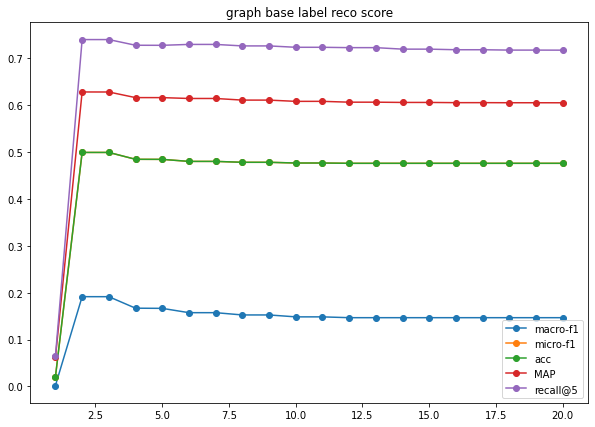

1 8
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.06434760448521916	recall_rank: 2.120792079207921
depth:1	macro_f1: 0.19137110421722192	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.6277437988447117	recall: 0.7394240570846076	recall_rank: 1.4676891263139755
depth:2	macro_f1: 0.19140197798258018	micro_f1: 0.49898063200815496	acc: 0.49898063200815496	MAP: 0.6278499830105289	recall: 0.7392966360856269	recall_rank: 1.4670803171320235
depth:3	macro_f1: 0.17200626008505696	micro_f1: 0.4906982670744139	acc: 0.4906982670744139	MAP: 0.6229973666326836	recall: 0.7380224260958206	recall_rank: 1.480835635359116
depth:4	macro_f1: 0.17200626008505696	micro_f1: 0.4906982670744139	acc: 0.4906982670744139	MAP: 0.6229718824328875	recall: 0.7380224260958206	recall_rank: 1.480835635359116
depth:5	macro_f1: 0.1629967123686109	micro_f1: 0.48674821610601426	acc: 0.48674821610601426	MAP: 0.6210818042813415	re

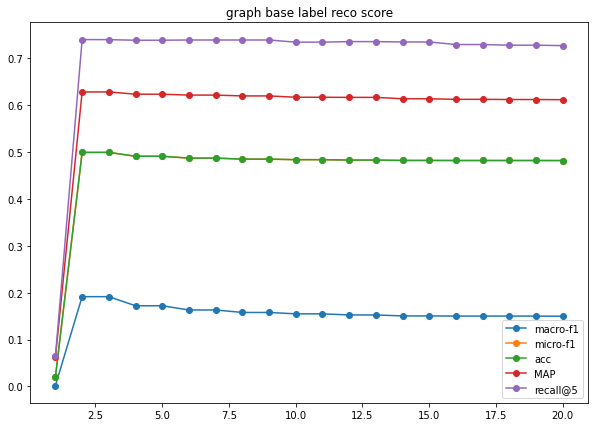

2 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.06434760448521916	recall_rank: 2.120792079207921
depth:1	macro_f1: 0.19128860819089205	micro_f1: 0.49859836901121307	acc: 0.49859836901121307	MAP: 0.6276036357458331	recall: 0.7394240570846076	recall_rank: 1.468033775633293
depth:2	macro_f1: 0.19139066815095535	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.627745922528028	recall: 0.7395514780835881	recall_rank: 1.4681254307374225
depth:3	macro_f1: 0.1332782796708061	micro_f1: 0.44062181447502546	acc: 0.44062181447502546	MAP: 0.5492460924226971	recall: 0.6253822629969419	recall_rank: 1.4508964955175223
depth:4	macro_f1: 0.13328918975364307	micro_f1: 0.44062181447502546	acc: 0.44062181447502546	MAP: 0.5491908766564721	recall: 0.6252548419979612	recall_rank: 1.4505808029345832
depth:5	macro_f1: 0.12078835717759066	micro_f1: 0.400993883792049	acc: 0.4009938837920489	MAP: 0.5018391097519546	r

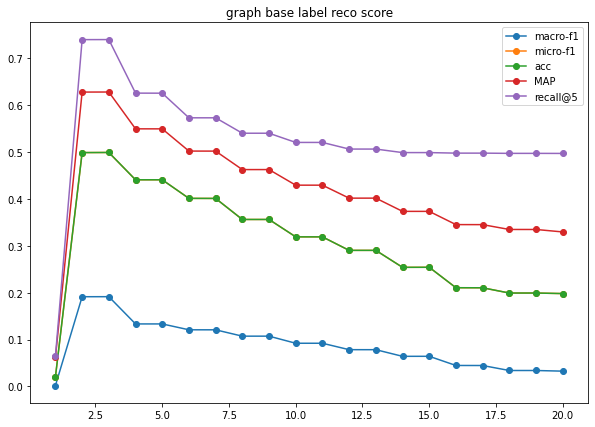

4 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.06434760448521916	recall_rank: 2.120792079207921
depth:1	macro_f1: 0.19133928300935307	micro_f1: 0.4988532110091743	acc: 0.4988532110091743	MAP: 0.627758664627926	recall: 0.7395514780835881	recall_rank: 1.4681254307374225
depth:2	macro_f1: 0.19139850440653308	micro_f1: 0.49898063200815496	acc: 0.49898063200815496	MAP: 0.6277671593611915	recall: 0.7392966360856269	recall_rank: 1.4675973802137194
depth:3	macro_f1: 0.13172138362281605	micro_f1: 0.436289500509684	acc: 0.436289500509684	MAP: 0.5443212708120956	recall: 0.6193934760448522	recall_rank: 1.4507303024069123
depth:4	macro_f1: 0.1317240243152506	micro_f1: 0.436289500509684	acc: 0.436289500509684	MAP: 0.5443467550118917	recall: 0.6193934760448522	recall_rank: 1.4507303024069123
depth:5	macro_f1: 0.11795093917390972	micro_f1: 0.389908256880734	acc: 0.38990825688073394	MAP: 0.4943425076452605	recall:

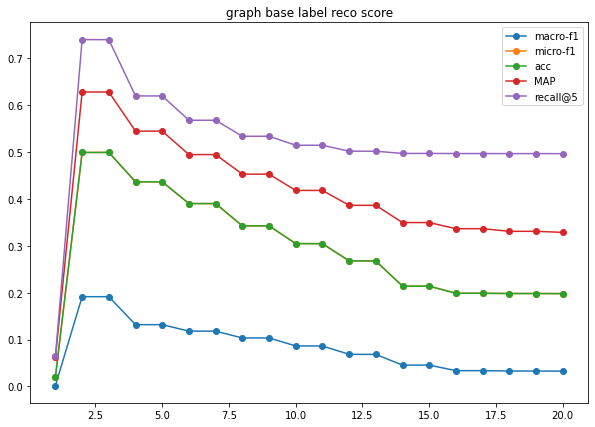

8 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.06434760448521916	recall_rank: 2.120792079207921
depth:1	macro_f1: 0.19198788062187583	micro_f1: 0.49898063200815496	acc: 0.49898063200815496	MAP: 0.6278308698606818	recall: 0.7391692150866462	recall_rank: 1.4669884502671953
depth:2	macro_f1: 0.19200744561245223	micro_f1: 0.49898063200815496	acc: 0.49898063200815496	MAP: 0.6278160040774674	recall: 0.7392966360856269	recall_rank: 1.4672526714925889
depth:3	macro_f1: 0.13126545393349828	micro_f1: 0.43527013251783886	acc: 0.4352701325178389	MAP: 0.5434165817193332	recall: 0.6185015290519877	recall_rank: 1.4509682735887928
depth:4	macro_f1: 0.13126545393349828	micro_f1: 0.43527013251783886	acc: 0.4352701325178389	MAP: 0.5434102106693841	recall: 0.6185015290519877	recall_rank: 1.4509682735887928
depth:5	macro_f1: 0.11720509697201231	micro_f1: 0.38659531090723753	acc: 0.38659531090723753	MAP: 0.492133876996

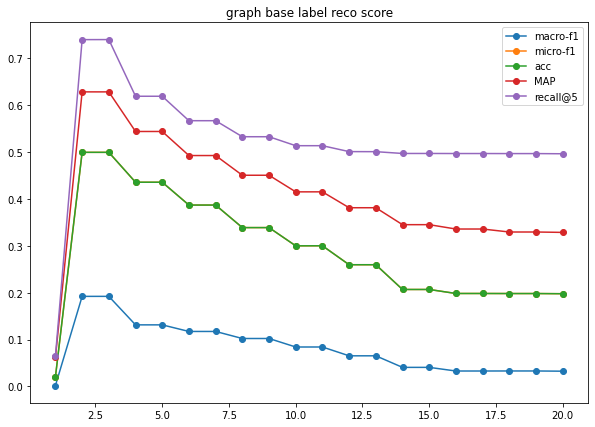

In [14]:
macro_f1_dict = {}
micro_f1_dict = {}
acc_dict = {}
MAP_dict = {}
recall3_dict = {}
recall_rank_dict = {}

for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]:
    print(w1, w2)
    adj_matrix = np.hstack([np.zeros((recipe_num, recipe_num)), w1*train_features, w2*train_labels])
    temp_matrix = np.hstack([w1*train_features.T, np.zeros((ingred_num, ingred_num)), np.zeros((ingred_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    temp_matrix = np.hstack([w2*train_labels.T, np.zeros((label_num, ingred_num)), np.zeros((label_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    adj_matrix = csr_matrix(adj_matrix)
    
    query_num, _ = valid_features.shape
    score_matrix = csr_matrix(np.hstack([np.zeros((query_num, recipe_num)), valid_features, np.zeros((query_num, label_num))]))
    src_matrix = score_matrix.copy()
    
    score_matrix = normalize(score_matrix, axis=1, norm='l1')
    exist_idx = score_matrix > 0
    
    macro_f1_lst = []
    micro_f1_lst = []
    acc_lst = []
    MAP_lst = []
    recall3_lst = []
    recall_rank_lst = []
    
    for k in range(depth):
        # start node의 누적 점수 * 인접행렬 -> next node에 더해질 값
        src_matrix = np.multiply(score_matrix.toarray(), src_matrix.toarray()) @ adj_matrix
        score_matrix = csr_matrix(score_matrix + src_matrix)
        score_matrix = normalize(score_matrix, axis=1, norm='l1')
        # next_node의 score matrix
        src_matrix = score_matrix.toarray() * (src_matrix>0)
        src_recipe_matrix = topk_per_row(src_matrix[:, :recipe_num], recipe_threshold)
        src_ingred_matrix = topk_per_row(src_matrix[:, recipe_num:recipe_num+ingred_num], ingred_threshold)
        src_label_matrix = topk_per_row(src_matrix[:, recipe_num+ingred_num:], label_threshold)
        src_matrix = csr_matrix(np.hstack([src_recipe_matrix, src_ingred_matrix, src_label_matrix]))

        score_matrix_ = score_matrix.copy()
        score_matrix_[exist_idx] = 0

        label_recs = {}
        label_rec_idx_lst = np.argpartition(score_matrix_[:, recipe_num+ingred_num:].toarray(), -label_topk)[:,-label_topk:]
        top_recommends = label_rec_idx_lst[:,0].flatten()

        for query, label_rec_idx in enumerate(label_rec_idx_lst):
            label_recs[query] = []

            for idx in label_rec_idx:
                label_recs[query].append((idx, score_matrix_[query, recipe_num + ingred_num + idx]))

            label_recs[query].sort(key=lambda x : x[1], reverse=True)


        metric = get_metric(label_recs, answer_dict, n=3)
        MAP_lst.append(metric['map'])
        recall3_lst.append(metric['recall'])
        recall_rank_lst.append(metric['recall_rank'])
        macro_f1_lst.append(metric['macro'])
        micro_f1_lst.append(metric['micro'])
        acc_lst.append(metric['accuracy'])
        if k % 1 == 0:
            print("depth:{}\tmacro_f1: {}\tmicro_f1: {}\tacc: {}\tMAP: {}\trecall: {}\trecall_rank: {}"
                  .format(k, metric['macro'], metric['micro'], metric['accuracy'], metric['map'], metric['recall'], metric['recall_rank']))
            with open("./recs/Graph_rec_clf_{}_{}_depth_{}.pickle".format(w1,w2,k), 'wb') as f:
                pickle.dump(label_recs, f)
                
    macro_f1_dict[w1/w2] = macro_f1_lst
    micro_f1_dict[w1/w2] = micro_f1_lst
    acc_dict[w1/w2] = acc_lst
    MAP_dict[w1/w2] = MAP_lst
    recall3_dict[w1/w2] = recall3_lst
    recall_rank_dict[w1/w2] = recall_rank_lst
    
    depth_lst = [i for i in range(1, depth+1)]

    plt.figure(figsize=(10,7))
    plt.plot(depth_lst, macro_f1_lst, 'o-', label='macro-f1')
    plt.plot(depth_lst, micro_f1_lst, 'o-', label='micro-f1')
    plt.plot(depth_lst, acc_lst, 'o-', label='acc')
    plt.plot(depth_lst, MAP_lst, 'o-', label='MAP')
    plt.plot(depth_lst, recall3_lst, 'o-', label='recall@3')
    plt.title("graph base label reco score")
    plt.legend()
    plt.savefig('./data_analysis/graph_clf_scores_{}_{}.png'.format(w1,w2), dpi=100)
    plt.show()

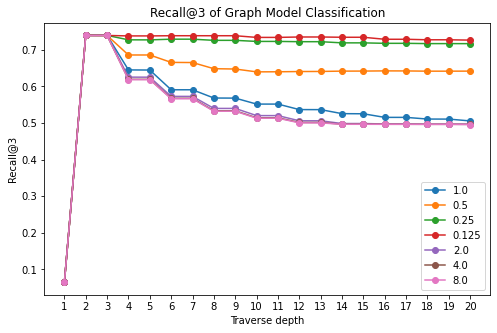

In [8]:
ratio_lst = [w1/w2 for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]]
depth_lst = [i for i in range(1, depth+1)]

plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall3_dict[ratio], 'o-', label=str(ratio))
plt.title("Recall@3 of Graph Model Classification")
plt.xlabel('Traverse depth')
plt.ylabel('Recall@3')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_clf_recall3.png', dpi=100)
plt.show()

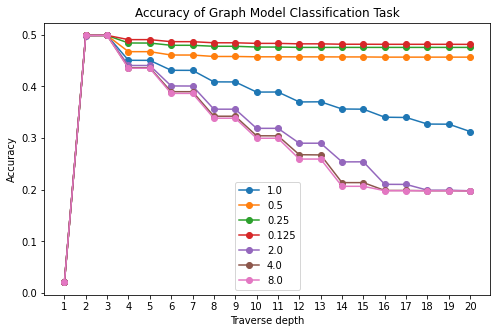

In [12]:
plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, acc_dict[ratio], 'o-', label=str(ratio))
plt.title("Accuracy of Graph Model Classification")
plt.xlabel('Traverse depth')
plt.ylabel('Accuracy')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_clf_acc.png', dpi=100)
plt.show()

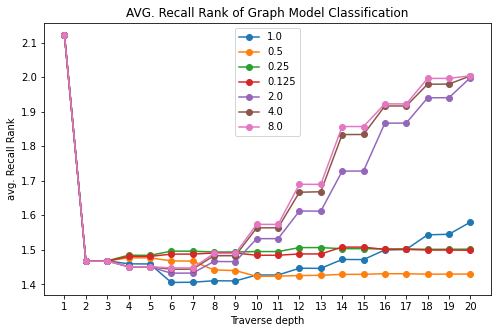

In [9]:
plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall_rank_dict[ratio], 'o-', label=str(ratio))
plt.title("AVG. Recall Rank of Graph Model Classification")
plt.xlabel('Traverse depth')
plt.ylabel('avg. Recall Rank')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_clf_recall_rank.png', dpi=100)
plt.show()

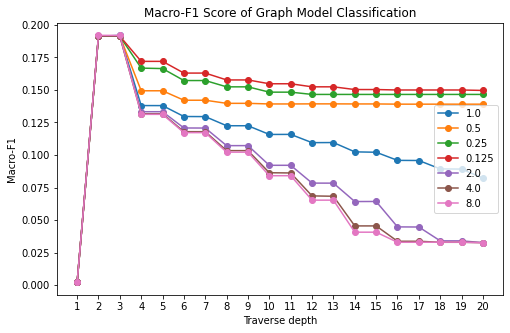

In [10]:
plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, macro_f1_dict[ratio], 'o-', label=str(ratio))
plt.title("Macro-F1 Score of Graph Model Classification")
plt.xlabel('Traverse depth')
plt.ylabel('Macro-F1')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_clf_macro.png', dpi=100)
plt.show()

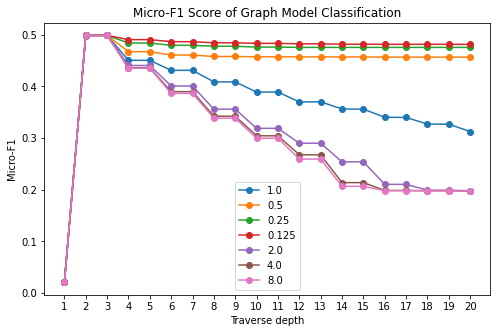

In [11]:
plt.figure(figsize=(8,5))
for ratio in ratio_lst:
    plt.plot(depth_lst, micro_f1_dict[ratio], 'o-', label=str(ratio))
plt.title("Micro-F1 Score of Graph Model Classification")
plt.xlabel('Traverse depth')
plt.ylabel('Micro-F1')
plt.xticks(depth_lst)
plt.legend()
plt.savefig('./data_analysis/graph_clf_micro.png', dpi=100)
plt.show()

In [6]:
macro_f1_dict = {}
micro_f1_dict = {}
acc_dict = {}
MAP_dict = {}
recall3_dict = {}
recall_rank_dict = {}

for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]:
    macro_f1_lst = []
    micro_f1_lst = []
    acc_lst = []
    MAP_lst = []
    recall3_lst = []
    recall_rank_lst = []
    
    for k in range(depth):
        with open("./recs/Graph_rec_clf_{}_{}_depth_{}.pickle".format(w1,w2,k), 'rb') as f:
            label_recs = pickle.load(f)
        
        metric = get_metric(label_recs, answer_dict, n=3)
        MAP_lst.append(metric['map'])
        recall3_lst.append(metric['recall'])
        recall_rank_lst.append(metric['recall_rank'])
        macro_f1_lst.append(metric['macro'])
        micro_f1_lst.append(metric['micro'])
        acc_lst.append(metric['accuracy'])
                
    macro_f1_dict[w1/w2] = macro_f1_lst
    micro_f1_dict[w1/w2] = micro_f1_lst
    acc_dict[w1/w2] = acc_lst
    MAP_dict[w1/w2] = MAP_lst
    recall3_dict[w1/w2] = recall3_lst
    recall_rank_dict[w1/w2] = recall_rank_lst

In [14]:
for ratio in ratio_lst:
    print(ratio, np.max(acc_dict[ratio]))

1.0 0.4988532110091743
0.5 0.4988532110091743
0.25 0.4988532110091743
0.125 0.49898063200815496
2.0 0.4988532110091743
4.0 0.49898063200815496
8.0 0.49898063200815496


In [15]:
for ratio in ratio_lst:
    print(ratio, np.mean(acc_dict[ratio]))

1.0 0.3739041794087666
0.5 0.440940366972477
0.25 0.4567596839959226
0.125 0.46230249745158003
2.0 0.3078236493374108
4.0 0.29594164118246685
8.0 0.2930491845056065


In [12]:
for ratio in ratio_lst:
    print(ratio, np.max(macro_f1_dict[ratio]))

1.0 0.19196800482688609
0.5 0.19137110421722192
0.25 0.19137110421722192
0.125 0.19140197798258018
2.0 0.19139066815095535
4.0 0.19139850440653308
8.0 0.19200744561245223


In [13]:
for ratio in ratio_lst:
    print(ratio, np.mean(macro_f1_dict[ratio]))

1.0 0.11366147072183837
0.5 0.1389213340288788
0.25 0.14766308149737012
0.125 0.15174873725386903
2.0 0.08832966338323613
4.0 0.08284593654274804
8.0 0.0815841222456191
